In [1]:
import pandas as pd
import numpy as np
import warnings
import re
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

from dataset import get_dataframe

## Dataset scraped yearly
This dataset is created by scraping each year from IMDB starting from 1986-1987
This dataset contain 8475 unique movie titles

In [2]:
# dataset collected per year starting from 1986 - 1987
dataset1 = get_dataframe('./dataset')
dataset1.head(1)

,link,id,name,year,rating,genre,runtime,imdb_rate,description,Votes,...,meta.Opening Weekend USA:,meta.Gross USA:,meta.Cumulative Worldwide Gross:,meta.Production Co:,meta.Runtime:,meta.Sound Mix:,meta.Color:,meta.Aspect Ratio:,meta.storyline,meta.rating
0,http://www.imdb.com/title/tt1856101/,tt1856101,Blade Runner 2049,2017,14A,"Action, Drama, Mystery",164,8.0,Young Blade Runner K's discovery of a long-bur...,468719.0,...,327531228.0,92054159.0,259304838.0,"[Alcon Entertainment, Columbia Pictures, Sony]",164.0,"[Dolby Atmos, Auro 11.1, DTS, IMAX 6-Track, 12...",[Color],2.39 : 1,Thirty years after the events of Blade Runner ...,14A


In [3]:
dataset1.shape

(8475, 28)

Sorted by year

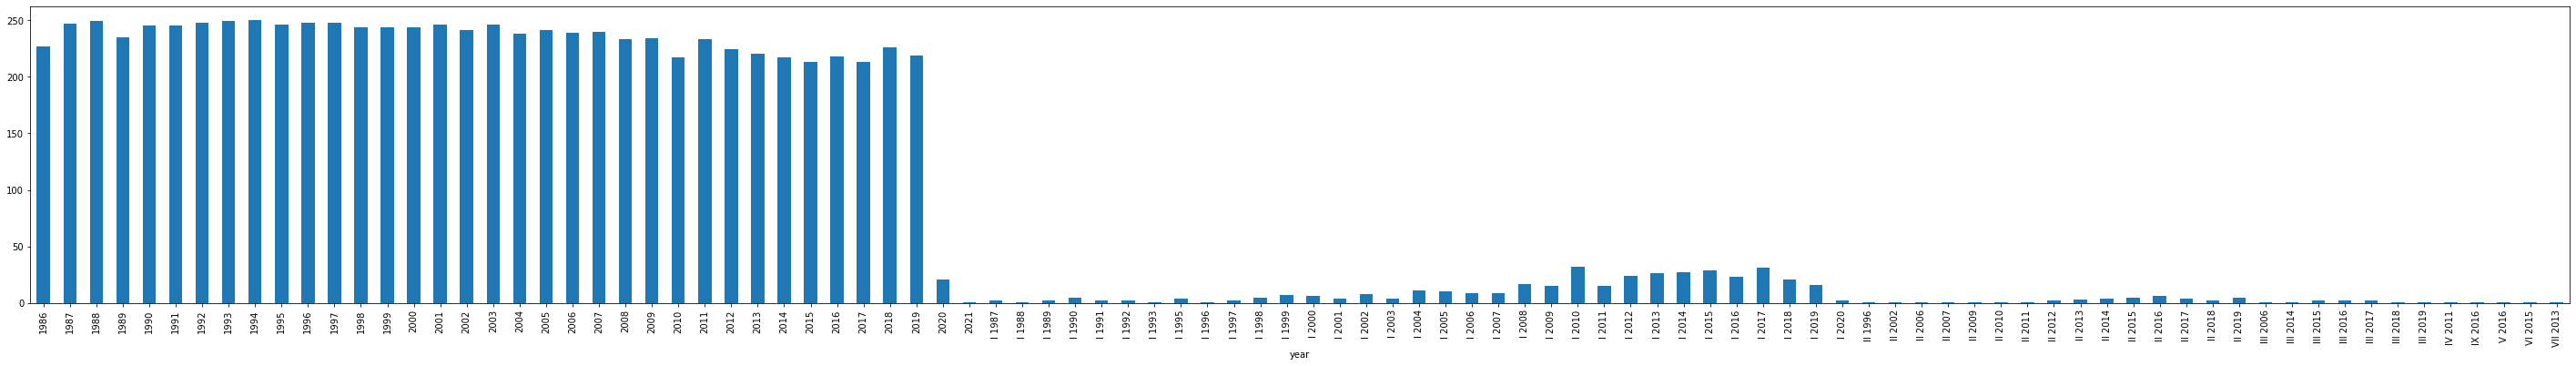

In [4]:
fig = plt.figure(figsize=(50,6))
dataset1.groupby('year')['id'].count().plot.bar(ylim=0)
plt.show()

Sorted by rating

In [5]:
# drop movies that does not have rating
dataset1 = dataset1[dataset1.rating != '']
dataset1 = dataset1[dataset1.description != '']
dataset1.shape

(8475, 28)

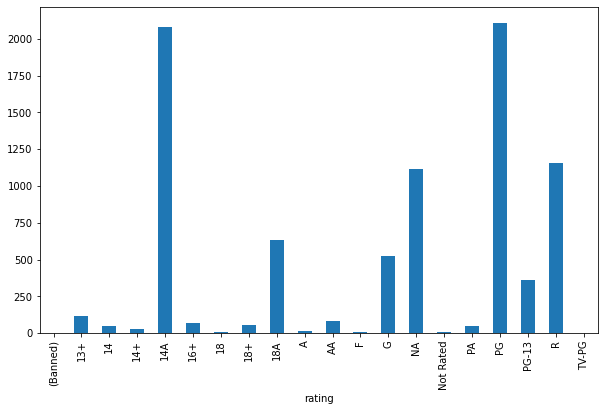

In [6]:
fig = plt.figure(figsize=(10,6))
dataset1.groupby('rating')['description'].count().plot.bar(ylim=0)
plt.show()

In [7]:
dataset1['rating'].unique()

array(['14A', 'PG', '18A', 'G', '16+', 'R', 'PG-13', '13+', 'NA',
       'Not Rated', '18+', '14', 'PA', '14+', 'AA', 'A', 'F', '18',
       '(Banned)', 'TV-PG'], dtype=object)

---

## Dataset scraped by IMDB advances search based on mpaa rating
https://www.imdb.com/search/title/
- With the advance search imdb allows to search following US mpaa ratings
- G, PG, PG-13, R, NC-17
- Additional features such as emotion was added

In [8]:
# dataset collected per year starting from 1986 - 1987
dataset2 = get_dataframe('./dataset_cleaned_emotions')
dataset2.head(1)

,link,id,name,year,rating,genre,runtime,imdb_rate,description,trust,...,meta.Release Date:,meta.Also Known As:,meta.Filming Locations:,meta.Budget:,meta.Opening Weekend USA:,meta.Gross USA:,meta.Cumulative Worldwide Gross:,meta.Runtime:,meta.Sound Mix:,meta.Aspect Ratio:
0,http://www.imdb.com/title/tt3694652/,tt3694652,Not So Paranormal Activity,,PG-13,"Comedy, Horror",0,0.0,Three high school graduates move into the same...,0.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset2.shape

(15455, 41)

Sorted by year

In [10]:
# clean years
def clean_year_field( text_str ):
    res = [int(i) for i in text_str.split() if i.isdigit()]
#     text = re.sub('TV Movie', '', text_str )
#     text = text.strip()
    try:
        year = res[0]
        return year
    except:
        year = ''
    return year

year_vals = []
for i, year in dataset2['year'].iteritems():
    cleaned_year = clean_year_field( str(year) )
    dataset2.iloc[i]['year'] = cleaned_year
    year_vals.append({
        'year' : cleaned_year
    })
    
year_df = pd.DataFrame(year_vals)
year_df.head
dataset2['year'] = year_df['year']

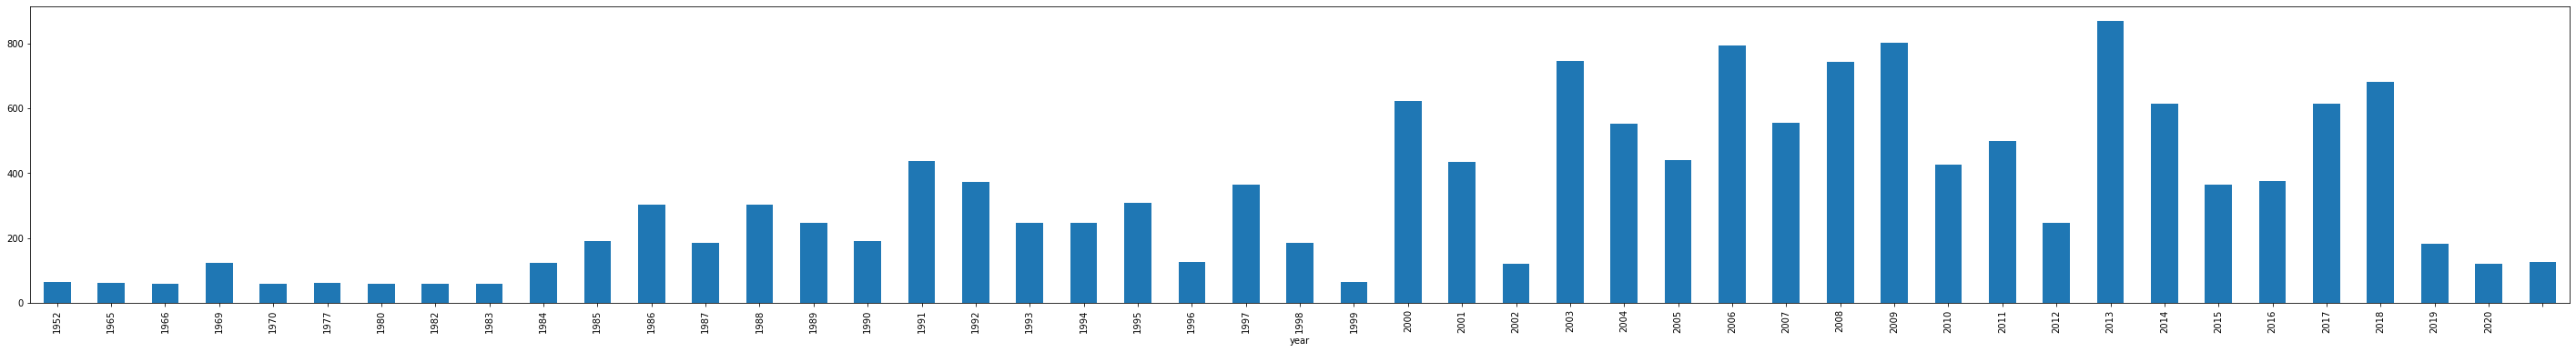

In [11]:
fig = plt.figure(figsize=(50,6))
dataset2.groupby('year')['id'].count().plot.bar(ylim=0)
plt.show()

Sorted by rating

In [12]:
# drop movies that does not have rating
dataset2 = dataset2[dataset2.rating != '']
dataset2 = dataset2[dataset2.description != '']
dataset2.shape

(15455, 41)

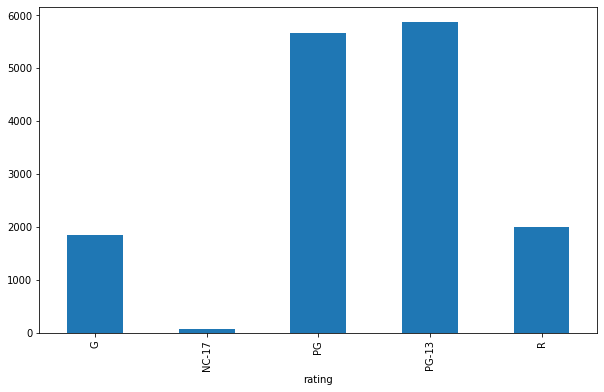

In [13]:
fig = plt.figure(figsize=(10,6))
dataset2.groupby('rating')['description'].count().plot.bar(ylim=0)
plt.show()

In [14]:
dataset1['rating'].unique()

array(['14A', 'PG', '18A', 'G', '16+', 'R', 'PG-13', '13+', 'NA',
       'Not Rated', '18+', '14', 'PA', '14+', 'AA', 'A', 'F', '18',
       '(Banned)', 'TV-PG'], dtype=object)

---

## Rotten Tomatoes dataset
This dataset is created by scraping rotten tomatoes website

In [139]:
dataset3 = pd.read_csv( './rtt_dataset/all_movie.csv' )
dataset3 = dataset3[['Title', 'Rating', 'Description', 'Year', 'Genre']]
dataset3.columns = dataset3.columns.str.strip()
dataset3.head(4)

,Title,Rating,Description,Year,Genre
0,The Mummy: Tomb of the Dragon Emperor,PG-13,The Fast and the Furious director Rob Cohen co...,2008,Action
1,The Masked Saint,PG-13,The journey of a professional wrestler who bec...,2016,Action
2,Spy Hard,PG-13,"Dead pan Leslie Nielsen stars as Dick Steele, ...",1996,Action
3,Der Baader Meinhof Komplex (The Baader Meinhof...,R,Director Uli Edel teams with screenwriter Bern...,2008,Action


In [140]:
dataset3.shape

(29810, 5)

Sorted by year

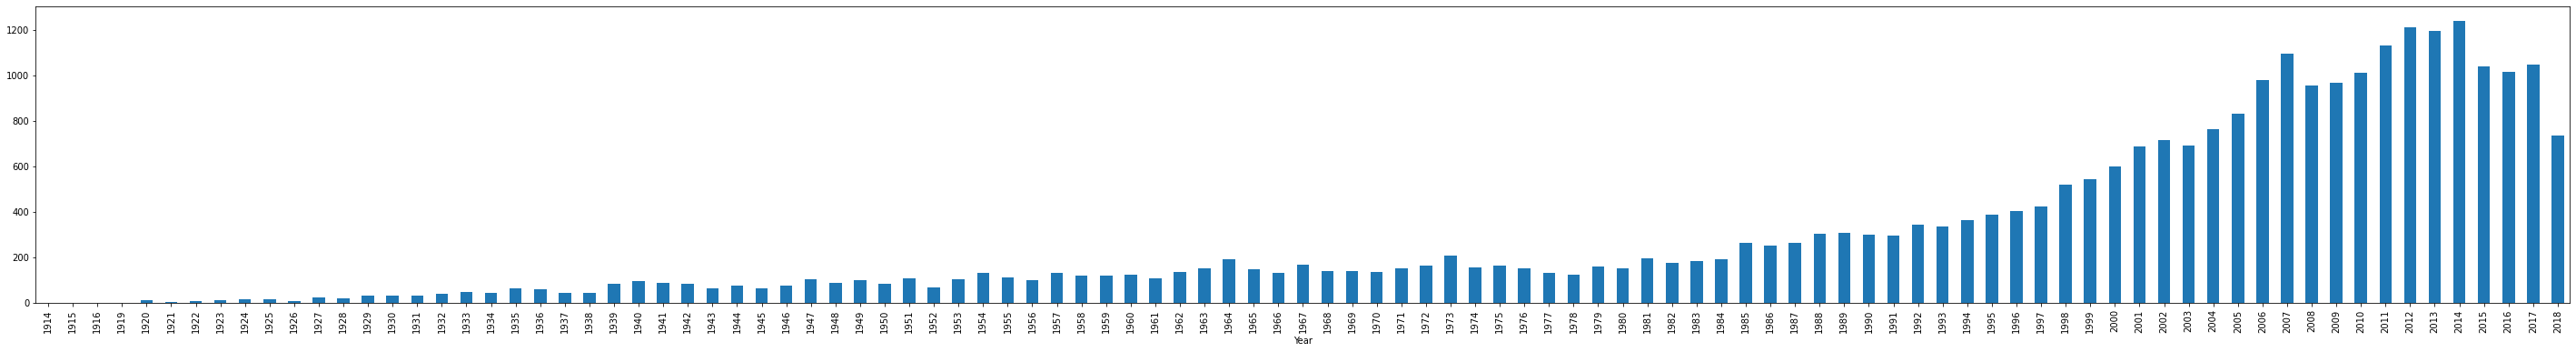

In [141]:
fig = plt.figure(figsize=(50,6))
dataset3.groupby('Year')['Title'].count().plot.bar(ylim=0)
plt.show()

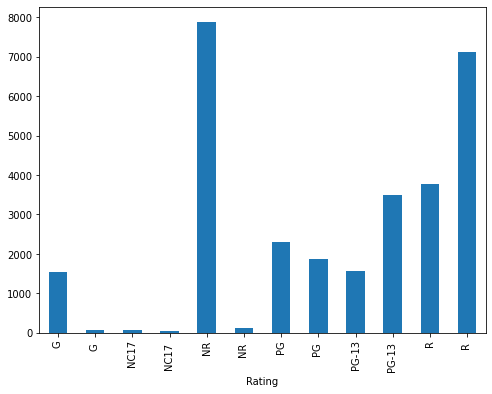

In [142]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
dataset3.groupby('Rating')['Description'].count().plot.bar(ylim=0)
plt.show()

In [143]:
dataset3['Rating'].unique()

array(['PG-13 ', 'PG-13', 'R ', 'NR', 'PG', 'G', 'PG ', 'R', 'G ', 'NR ',
       'NC17', 'NC17 '], dtype=object)

In [144]:
# Cleanring
# clean mpaa ratings
mpaa_fix = {
    'PG-13 ' : 'PG-13',
    'R ' : 'R',
    'PG ': 'PG',
    'G ' : 'G',
    'NR ': 'NR',
    'NC17 ': 'NC17'
}

clean_rate = []
for i, rating in dataset3['Rating'].iteritems():
    final_rate = rating
    clean_rate.append(rating.strip())    
        
dataset3['Rating'] = clean_rate

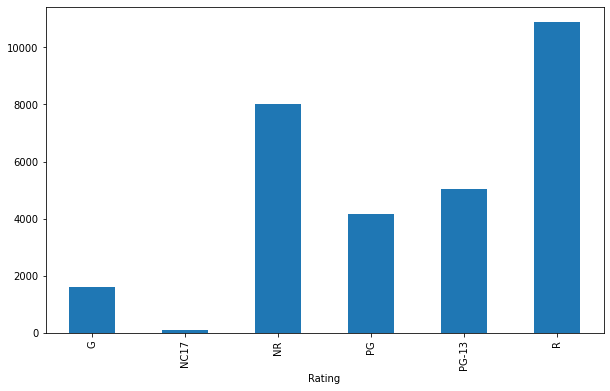

In [145]:
fig = plt.figure(figsize=(10,6))
dataset3.groupby('Rating')['Description'].count().plot.bar(ylim=0)
plt.show()

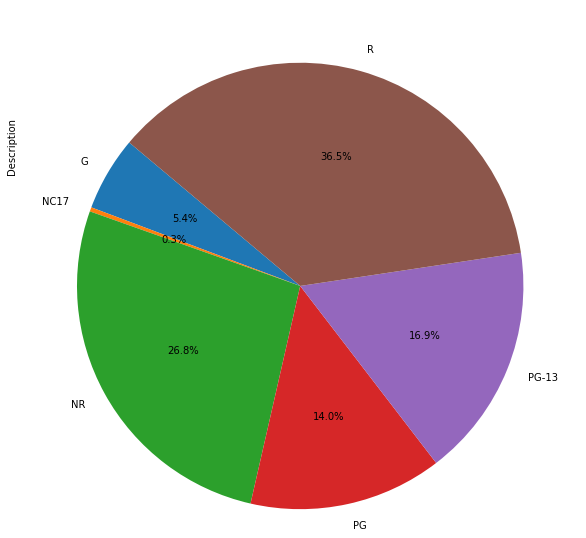

In [147]:
fig = plt.figure(figsize=(10,6))
dataset3.groupby('Rating')['Description'].count().plot.pie(ylim=0, autopct='%1.1f%%', shadow=False, startangle=140)
plt.show()


In [164]:
GCOUNT = dataset3[dataset3.Rating == 'G'].shape
GCOUNT

(1606, 5)

In [165]:
dataset3 = dataset3[dataset3.Rating != 'NC17']

In [166]:
dataset3 = dataset3.sample(frac=1).groupby('Rating').head(1606)
dataset3

,Title,Rating,Description,Year,Genre
17429,Hotel Rwanda,PG-13,Ten years ago some of the worst atrocities in ...,2004,Drama
16518,Leap!,PG,"11-year-old orphan, Flicie (Elle Fanning) has ...",2017,Drama
11494,The Hunting Ground,PG-13,"From the team behind THE INVISIBLE WAR, comes ...",2015,Documentary
6247,The Cowboys,PG,In one of John Wayne's more interesting late W...,1972,Classics
9934,A Charlie Brown Christmas,NR,Christmastime is here. Happiness and cheer. An...,1965,Comedy
...,...,...,...,...,...
23348,Bedknobs and Broomsticks,G,"This Disney film, set in wartime England, star...",1971,Kids&Family
3913,Margot at the Wedding,R,"Margot Zeller, a savagely bright, razor-tongue...",2007,Art&Foreign
3336,Saludos Amigos,G,This Walt Disney feature opens with live-actio...,1943,NaN
28169,Micki + Maude,PG-13,Blake Edwards' farce with Dudley Moore as a fr...,1984,Romance


In [167]:
count = dataset3[dataset3.Rating == 'G'].shape
count

(1606, 5)

In [168]:
count = dataset3[dataset3.Rating == 'NC17'].shape
count

(0, 5)

In [169]:
count = dataset3[dataset3.Rating == 'PG-13'].shape
count

(1606, 5)

In [170]:
count = dataset3[dataset3.Rating == 'PG'].shape
count

(1606, 5)

In [171]:
count = dataset3[dataset3.Rating == 'R'].shape
count

(1606, 5)

In [172]:
count = dataset3[dataset3.Rating == 'NR'].shape
count

(1606, 5)

In [173]:
print(len(dataset3['Title'].unique() ))

5903


In [174]:
print(len(dataset3['Description'].unique() ))

5957


In [175]:
print(len(dataset3['Genre'].unique() ))

12


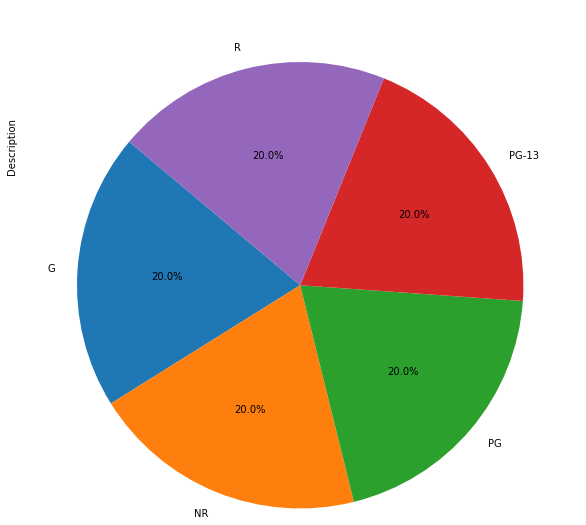

In [176]:
fig = plt.figure(figsize=(10,6))
dataset3.groupby('Rating')['Description'].count().plot.pie(ylim=0, autopct='%1.1f%%', shadow=False, startangle=140)
plt.show()